In [23]:
import tensorflow as tf
import keras.api._v2.keras as keras
import os,datetime

 Load Data

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Load image dataset using keras
data = keras.utils.image_dataset_from_directory('data')

Found 40000 files belonging to 2 classes.


In [5]:
data_iterator = data.as_numpy_iterator()


In [6]:
batch = data_iterator.next()

In [7]:
print(batch)# ([array of images],array of label/target)

(array([[[[169.      , 166.      , 157.      ],
         [167.33984 , 164.33984 , 155.33984 ],
         [164.13281 , 161.13281 , 152.13281 ],
         ...,
         [160.      , 159.      , 154.      ],
         [160.      , 159.      , 154.      ],
         [160.      , 159.      , 154.      ]],

        [[164.01953 , 161.01953 , 152.01953 ],
         [163.0484  , 160.0484  , 151.0484  ],
         [161.76741 , 158.76741 , 149.76741 ],
         ...,
         [160.83008 , 159.83008 , 154.83008 ],
         [160.83008 , 159.83008 , 154.83008 ],
         [160.83008 , 159.83008 , 154.83008 ]],

        [[160.13281 , 157.13281 , 148.13281 ],
         [159.89774 , 156.89774 , 147.89774 ],
         [160.1604  , 157.1604  , 148.1604  ],
         ...,
         [161.7168  , 160.7168  , 155.7168  ],
         [161.7168  , 160.7168  , 155.7168  ],
         [161.7168  , 160.7168  , 155.7168  ]],

        ...,

        [[164.      , 159.2832  , 152.4336  ],
         [165.66016 , 161.53836 , 152.90375 

In [8]:
print(batch[0].shape)
#The shape (32, 256, 256, 3) represents a 4-dimensional array or tensor. The dimensions correspond to:

#32: This dimension likely represents the number of samples or images in the dataset.
#256: This dimension represents the height of each image.
#256: This dimension represents the width of each image.
#3: This dimension represents the number of color channels in each image (typically Red, Green, and Blue for RGB images).

(32, 256, 256, 3)


In [9]:
print(batch[0][:1].shape)
#prints the shape of the first four elements along the first axis of the batch variable/print first 4 images in the array

(1, 256, 256, 3)


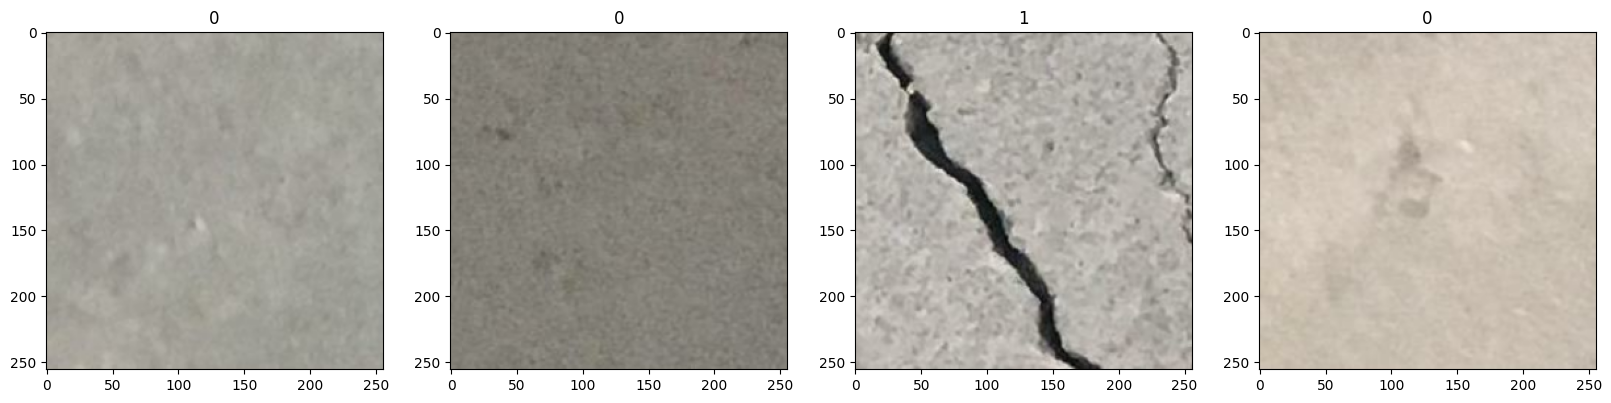

In [10]:
#Display images from dataset
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Data Scale

In [11]:
print(batch[0][1])
#Print the data in the form of array for 2nd image

[[[131.       127.       118.      ]
  [133.49023  129.49023  120.490234]
  [136.86719  132.86719  123.86719 ]
  ...
  [131.       128.       119.      ]
  [131.       128.       119.      ]
  [131.       128.       119.      ]]

 [[127.67969  123.67969  114.67969 ]
  [130.85895  126.85895  117.85895 ]
  [134.97195  130.97195  121.971954]
  ...
  [127.67969  124.67969  115.67969 ]
  [127.67969  124.67969  115.67969 ]
  [127.67969  124.67969  115.67969 ]]

 [[126.2832   122.2832   113.2832  ]
  [129.60352  125.603516 116.603516]
  [133.3534   129.3534   120.35339 ]
  ...
  [128.4336   125.43359  116.43359 ]
  [128.4336   125.43359  116.43359 ]
  [128.4336   125.43359  116.43359 ]]

 ...

 [[136.       133.       124.      ]
  [134.33984  131.33984  122.33984 ]
  [134.       131.       122.      ]
  ...
  [134.       131.       122.      ]
  [134.       131.       122.      ]
  [134.       131.       122.      ]]

 [[135.83008  132.83008  123.83008 ]
  [134.31097  131.31097  122.310974]


In [12]:
data = data.map(lambda x,y:(x/255,y))
#(x,y): ([array of data images], [array of targets])

In [13]:
#Check  if scaling is successful
data.as_numpy_iterator().next()

(array([[[[0.70980394, 0.69803923, 0.6784314 ],
          [0.7032935 , 0.6915288 , 0.67192096],
          [0.68790597, 0.67614126, 0.6565334 ],
          ...,
          [0.7137255 , 0.69411767, 0.67058825],
          [0.7137255 , 0.69411767, 0.67058825],
          [0.7137255 , 0.69411767, 0.67058825]],
 
         [[0.68701744, 0.67525274, 0.6556449 ],
          [0.6832091 , 0.6714444 , 0.6518366 ],
          [0.6800413 , 0.6682766 , 0.64866877],
          ...,
          [0.7137255 , 0.69411767, 0.67058825],
          [0.7137255 , 0.69411767, 0.67058825],
          [0.7137255 , 0.69411767, 0.67058825]],
 
         [[0.66267616, 0.65091145, 0.6313036 ],
          [0.66408765, 0.65232295, 0.6327151 ],
          [0.6684063 , 0.6566416 , 0.63703376],
          ...,
          [0.70810354, 0.6884957 , 0.6649663 ],
          [0.70810354, 0.6884957 , 0.6649663 ],
          [0.70810354, 0.6884957 , 0.6649663 ]],
 
         ...,
 
         [[0.66777724, 0.6481694 , 0.62464   ],
          [0.66452

Data split

In [14]:
train_size = int(len(data) * 0.7) 

# val data: used during training, to tune parameters like hidden layers
val_size = int(len(data) * 0.2) 

# test data: used after training, to see performance of model
test_size = int(len(data) * 0.1)

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

Building Deep Learning Model

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense, Flatten
from keras import optimizers

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(16, (3,3,),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
#Earlystopping callback
earlystop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 4)

In [24]:
#Tensorboard callback
logpath = os.path.join("tensorboard.log",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tb = tf.keras.callbacks.TensorBoard(logpath)

In [25]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss=tf.losses.binary_crossentropy,metrics=['accuracy'])

In [26]:
#Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

Train

In [27]:
hist = model.fit(train,epochs=10,validation_data=val,
callbacks = [earlystop,tb])

Epoch 1/10


875/875 [==============================] - 1025s 1s/step - loss: 0.0365 - accuracy: 0.9887 - val_loss: 0.0254 - val_accuracy: 0.9925
Epoch 2/10
875/875 [==============================] - 1038s 1s/step - loss: 0.0227 - accuracy: 0.9936 - val_loss: 0.0203 - val_accuracy: 0.9946
Epoch 3/10
875/875 [==============================] - 1038s 1s/step - loss: 0.0163 - accuracy: 0.9950 - val_loss: 0.0572 - val_accuracy: 0.9894
Epoch 4/10
875/875 [==============================] - 1112s 1s/step - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.0331 - val_accuracy: 0.9909
Epoch 5/10
875/875 [==============================] - 1081s 1s/step - loss: 0.0099 - accuracy: 0.9973 - val_loss: 0.0225 - val_accuracy: 0.9931
Epoch 6/10
875/875 [==============================] - 1087s 1s/step - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.0214 - val_accuracy: 0.9937


In [28]:
# get parameters of Keras History object
print(hist.params) 

{'verbose': 1, 'epochs': 10, 'steps': 875}


In [29]:
# get keys of Keras History object
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Plot Performance

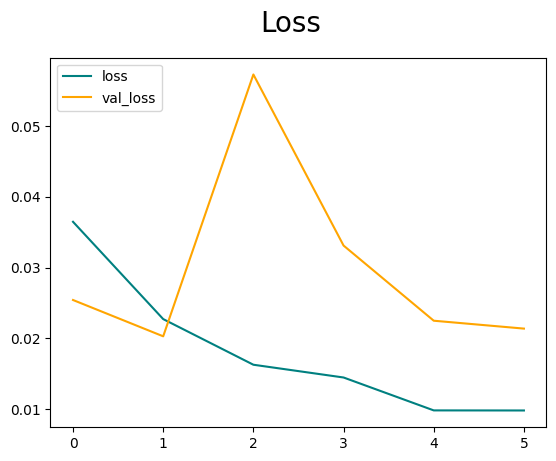

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

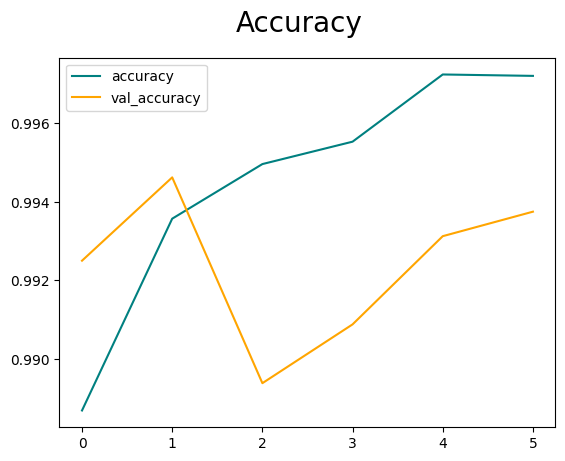

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

Evaluate

In [32]:
#Evaluate using Classification Report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

y_pred = model.predict(val)
# y_pred is probability, needs to convert to category
# probability less than 0.5 is class0
# probability more than 0.5 is class1
y_pred = np.where(y_pred > 0.5, 1, 0) 
y_test = tf.concat([y for x,y in val], axis=0)

# print Classification report
print(classification_report(y_test,y_pred))

250/250 [==============================] - 106s 330ms/step
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      3958
           1       0.51      0.52      0.52      4042

    accuracy                           0.51      8000
   macro avg       0.51      0.51      0.51      8000
weighted avg       0.51      0.51      0.51      8000



Test Model Deploy

In [33]:
import cv2

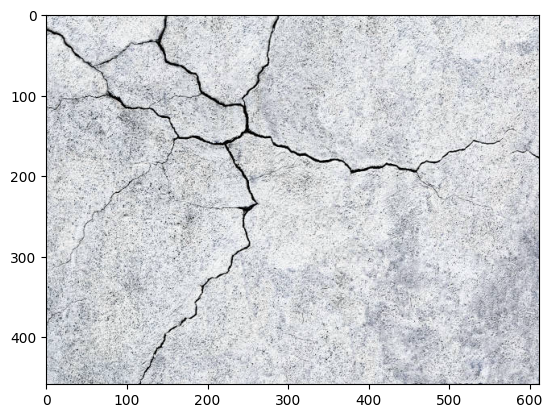

In [34]:
# place the name of the image you want to use
# to test deploy your model
#In this first test, use crack concrete image
img = cv2.imread('concrete_test.jpg') 
plt.imshow(img)
plt.show()

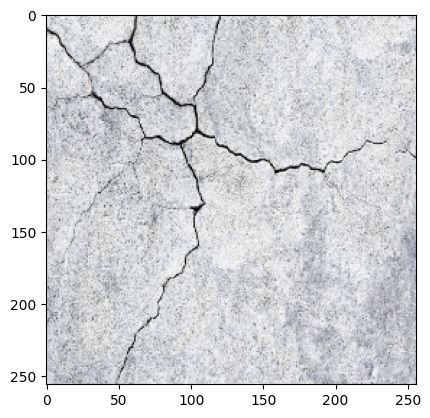

In [35]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
y_pred = model.predict(np.expand_dims(resize/255,0))
print(y_pred)

1/1 [==============================] - 0s 108ms/step
[[0.9999992]]


In [37]:
if y_pred > 0.5:
    print('Image above shows crack concrete') # class 1
else:
    print('Image above shows uncrack concrete') # class 0

Image above shows crack concrete


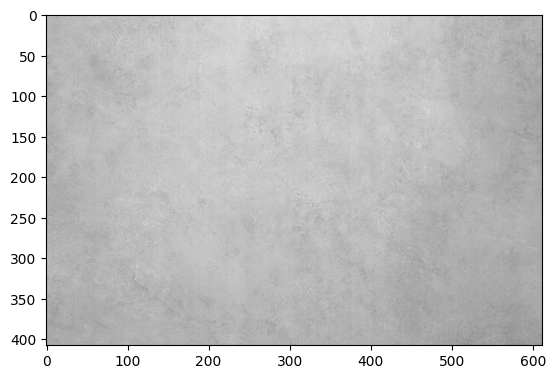

In [39]:
# This time, use uncrack concrete image
img = cv2.imread('uncrack_concrete_test.jpg') 
plt.imshow(img)
plt.show()

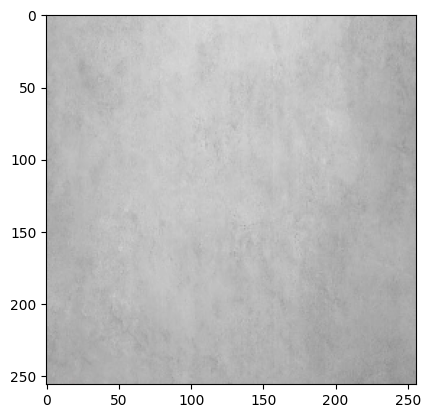

In [40]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [41]:
y_pred = model.predict(np.expand_dims(resize/255,0))
print(y_pred)

1/1 [==============================] - 0s 48ms/step
[[0.00117319]]


In [42]:
if y_pred > 0.5:
    print('Image above shows crack concrete') # class 1
else:
    print('Image above shows uncrack concrete') # class 0

Image above shows uncrack concrete


Save Model

In [43]:
model.save(os.path.join('models','classifyconcrete_v1.h5'))